In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

C:\Users\cadet\AppData\Local\Temp\ipykernel_20312\4272495862.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./steam.csv')

In [3]:
df['user_review'] = df['user_review'].apply(lambda x : str(x).strip())
df = df.dropna()

In [4]:
df['user_review'].apply(lambda x: str(x).strip() == '').sum()

0

#### Detect language to remove non english data

In [5]:
from langdetect import detect

def detect_lang(text):
    try:
        return detect(text)
    except:
        return 'unknown'

ModuleNotFoundError: No module named 'langdetect'

In [ ]:
df['lang'] = df['user_review'].apply(detect_lang)
df['lang'].unique()

array(['en', 'so', 'unknown', 'vi', 'no', 'it', 'sk', 'uk', 'pl', 'de',
       'nl', 'cy', 'tl', 'hu', 'el', 'ru', 'tr', 'et', 'ja', 'bg', 'es',
       'fr', 'cs', 'pt', 'ro', 'ko', 'zh-cn', 'sv', 'th', 'fi', 'he',
       'sl', 'id'], dtype=object)

In [ ]:
df = df[df['lang'] == 'en'] # Keep only english reviews

df = df[:1000] # Subsample

array(['en'], dtype=object)

In [ ]:
def clean_data(text):
    # Remove all the special characters
    processed_text = re.sub(r'\W', ' ', text)
    # remove all single characters
    processed_text= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)
    # Remove single characters from the start
    processed_text = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_text)
    # Substituting multiple spaces with single space
    processed_text = re.sub(r'\s+', ' ', processed_text, flags=re.I)
    # Removing prefixed 'b'
    processed_text = re.sub(r'^b\s+', '', processed_text)
    # Converting to Lowercase
    processed_text = processed_text.lower()

    return processed_text

In [ ]:
df['user_review'] = df['user_review'].apply(clean_data)
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,i scared and hearing creepy voices so ll pause...,1
1,2,Spooky's Jump Scare Mansion,2016.0,best game more better than sam pepper youtube ...,1
2,3,Spooky's Jump Scare Mansion,2016.0,a littly iffy on the controls but once you kno...,1
3,4,Spooky's Jump Scare Mansion,2015.0,great game fun and colorful and all that side ...,1
4,5,Spooky's Jump Scare Mansion,2015.0,not many games have the cute tag right next to...,1
...,...,...,...,...,...
995,996,Fractured Space,2016.0,early access reviewpersonally downloaded this ...,1
996,997,Fractured Space,2016.0,early access reviewthis game is honestly one t...,1
997,998,Fractured Space,2018.0,it was such fun game early on had an issue whe...,1
998,999,Fractured Space,2016.0,early access reviewa great game beautiful grap...,1


In [ ]:
df = df[['user_review', 'user_suggestion']]
df

,user_review,user_suggestion
0,i scared and hearing creepy voices so ll pause...,1
1,best game more better than sam pepper youtube ...,1
2,a littly iffy on the controls but once you kno...,1
3,great game fun and colorful and all that side ...,1
4,not many games have the cute tag right next to...,1
...,...,...
995,early access reviewpersonally downloaded this ...,1
996,early access reviewthis game is honestly one t...,1
997,it was such fun game early on had an issue whe...,1
998,early access reviewa great game beautiful grap...,1


In [ ]:
df = df.drop_duplicates(subset="user_review")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_review      998 non-null    object
 1   user_suggestion  998 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


[]

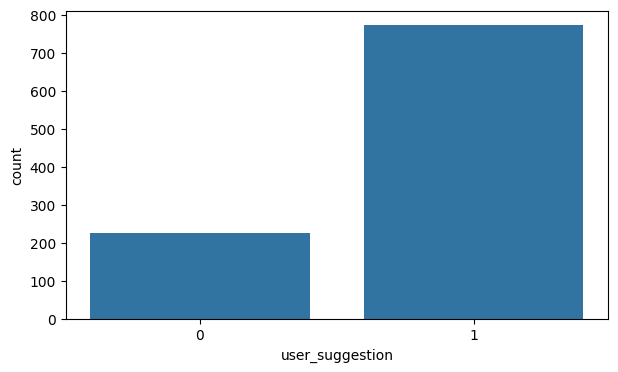

In [ ]:
plt.figure(figsize=[7, 4])
sns.countplot(x= df["user_suggestion"], data=df)
plt.plot()